In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv('Lebanon PM Data Combined.csv')
df.columns

Index(['age_bracket', 'child_gender', 'type_childlabour_hospitality',
       'type_childlabour_agric', 'type_childlabour_construct',
       'type_childlabour_concierge', 'type_childlabour_manufact',
       'type_childlabour_begging', 'type_childlabour_hhchores',
       'type_childlabour_mechanics', 'type_childlabour_delivery',
       'type_childlabour_other', 'type_childlabour_dk',
       'type_childlabour_noreply', 'type_childlabour_wholesale',
       'type_childlabour_sellingstreets', 'school_attend', 'hazard_physhazard',
       'hazard_bonded', 'hazard_streets', 'hazard_gambling', 'hazard_drug',
       'hazard_nopay', 'hazard_none', 'hazard_other', 'hazard_dk',
       'hazard_noreply', 'id', 'year', 'quarter', 'type_childlabour_domestic',
       'type_childlabour_transport'],
      dtype='object')

/var/folders/jr/6sjr6w2n2vl7yr0dn6y4xrmm0000gn/T/ipykernel_81914/3943805934.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  gender_plot = sns.countplot(data=df_gender_unique, x='child_gender', palette='Set2', edgecolor='black')


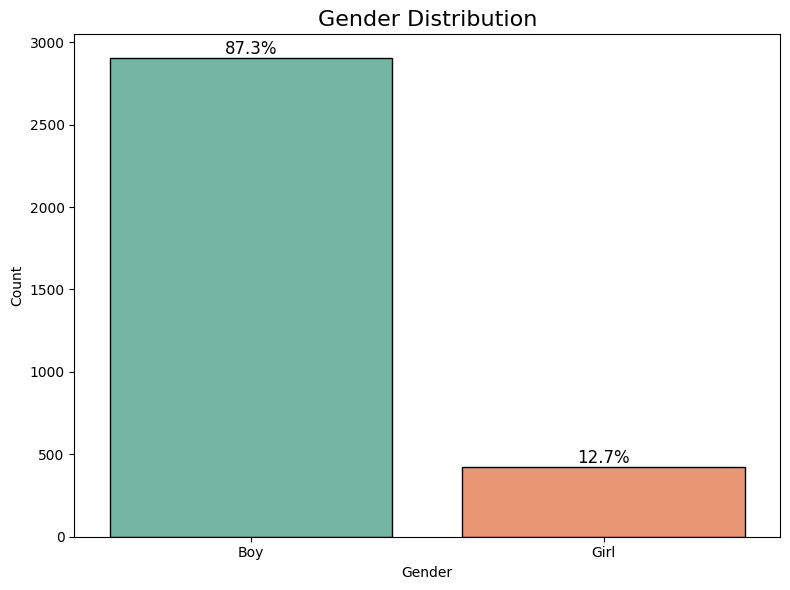

In [69]:
# Filter out 'No reply' and drop duplicates
df_gender_unique = df[df['child_gender'].str.lower() != 'no reply'].drop_duplicates(subset=['id', 'year'])

# Countplot for gender
plt.figure(figsize=(8, 6))
gender_plot = sns.countplot(data=df_gender_unique, x='child_gender', palette='Set2', edgecolor='black')

# Add percentage labels
total = len(df_gender_unique)
for p in gender_plot.patches:
    percentage = 100 * p.get_height() / total
    gender_plot.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='bottom', fontsize=12)

plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('gender_distribution_PM_Leb.png')
plt.show()

/var/folders/jr/6sjr6w2n2vl7yr0dn6y4xrmm0000gn/T/ipykernel_81914/3830054038.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  gender_plot = sns.countplot(data=df_gender_unique, x='age_bracket', palette='Set2', edgecolor='black')


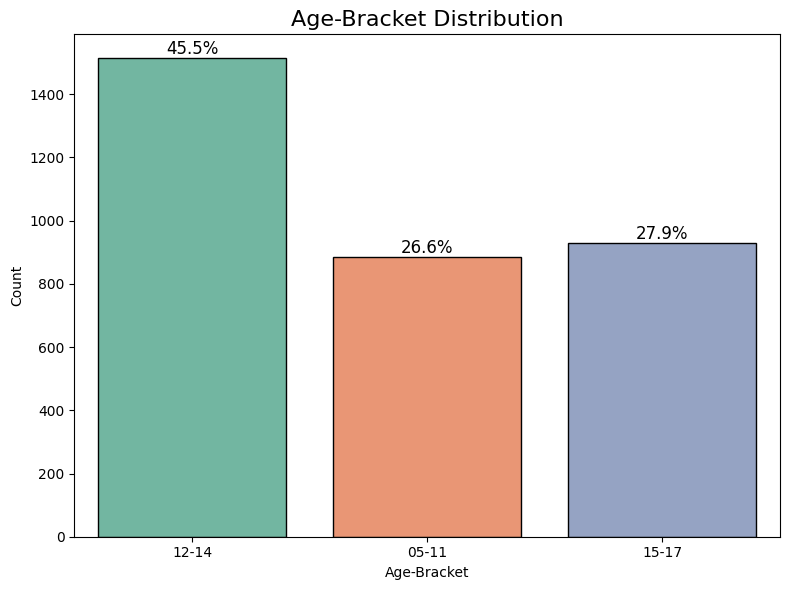

In [71]:
# Filter out 'No reply' and drop duplicates
df_gender_unique = df[df['child_gender'].str.lower() != 'no reply'].drop_duplicates(subset=['id', 'year'])

# Countplot for gender
plt.figure(figsize=(8, 6))
gender_plot = sns.countplot(data=df_gender_unique, x='age_bracket', palette='Set2', edgecolor='black')

# Add percentage labels
total = len(df_gender_unique)
for p in gender_plot.patches:
    percentage = 100 * p.get_height() / total
    gender_plot.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='bottom', fontsize=12)

plt.title('Age-Bracket Distribution', fontsize=16)
plt.xlabel('Age-Bracket')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('age_distribution_PM_Leb.png')
plt.show()

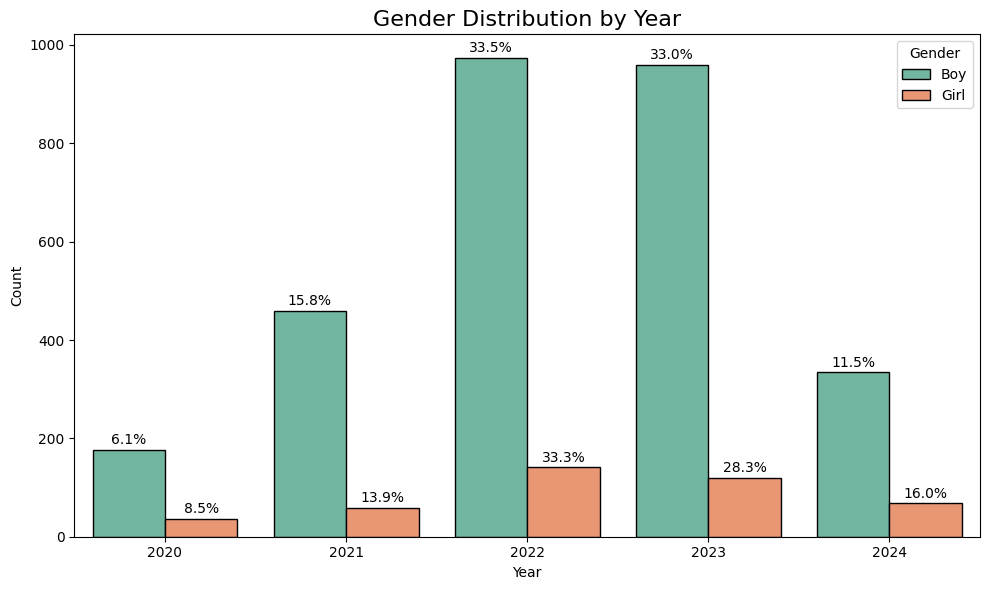

In [74]:
# Filter and drop duplicates
df_gender = df[df['child_gender'].str.lower() != 'no reply'].drop_duplicates(subset=['id', 'year'])

# Plot
plt.figure(figsize=(10, 6))
gender_plot = sns.countplot(data=df_gender, x='year', hue='child_gender', palette='Set2', edgecolor='black')

# Add percentage labels
for c in gender_plot.containers:
    labels = [f'{(v.get_height() / sum([b.get_height() for b in c]) * 100):.1f}%' if v.get_height() > 0 else ''
              for v in c]
    gender_plot.bar_label(c, labels=labels, label_type='edge', fontsize=10, padding=2)

# Format
plt.title('Gender Distribution by Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.tight_layout()
plt.savefig('gender_peryear_distribution_PM_Leb.png')
plt.show()


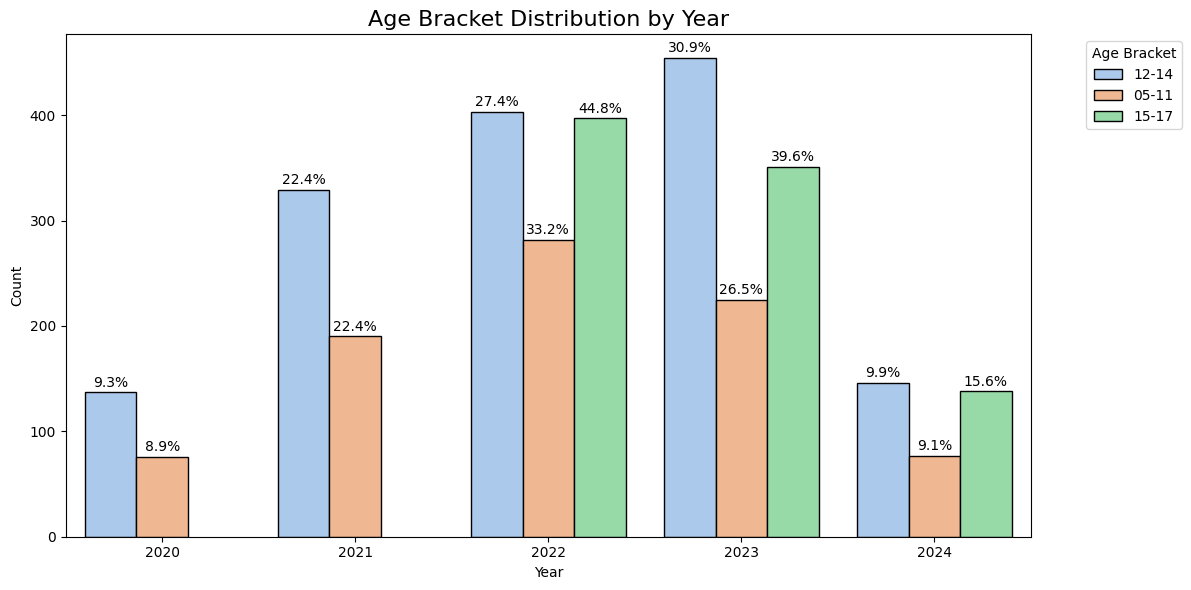

In [75]:
# Drop duplicates to ensure unique individuals
df_age = df.drop_duplicates(subset='id')

# Plot
plt.figure(figsize=(12, 6))
age_plot = sns.countplot(data=df_age, x='year', hue='age_bracket', palette='pastel', edgecolor='black')

# Add percentage labels
for c in age_plot.containers:
    labels = [f'{(v.get_height() / sum([b.get_height() for b in c]) * 100):.1f}%' if v.get_height() > 0 else ''
              for v in c]
    age_plot.bar_label(c, labels=labels, label_type='edge', fontsize=10, padding=2)

# Format
plt.title('Age Bracket Distribution by Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Age Bracket', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('age_distribution_peryear_PM_Leb.png')
plt.show()

In [70]:
# Filter rows where hospitality child labour occurred
df_filtered = df[df['type_childlabour_hospitality'] > 0]

# Drop duplicates by ID and year (in case multiple entries per ID per year)
df_filtered = df_filtered.drop_duplicates(subset=['id', 'year'])

# Group by year and count unique IDs
hospitality_counts = df_filtered.groupby('year')['id'].nunique()

print(hospitality_counts)

year
2020    10
2021    19
2022    63
2023    60
2024    17
Name: id, dtype: int64


In [71]:
# Step 1: Count unique IDs per year (denominator)
unique_ids_per_year = df.drop_duplicates(subset=['id', 'year']).groupby('year')['id'].nunique()

# Step 2: Prepare the count summary (numerator)
childlabour_cols = [
    'type_childlabour_hospitality', 'type_childlabour_agric', 'type_childlabour_construct',
    'type_childlabour_concierge', 'type_childlabour_manufact', 'type_childlabour_begging',
    'type_childlabour_hhchores', 'type_childlabour_mechanics', 'type_childlabour_delivery',
    'type_childlabour_other', 'type_childlabour_dk',
    'type_childlabour_wholesale', 'type_childlabour_sellingstreets',
    'type_childlabour_domestic', 'type_childlabour_transport'
]

result = {}

for col in childlabour_cols:
    filtered = df[df[col] > 0].drop_duplicates(subset=['id', 'year'])
    counts = filtered.groupby('year')['id'].nunique()
    result[col] = counts

# Step 3: Combine to form a DataFrame of counts
childlabour_counts = pd.DataFrame(result).fillna(0)

# Step 4: Convert to percentages
childlabour_percentages = (childlabour_counts.T / unique_ids_per_year).T * 100
childlabour_percentages = childlabour_percentages.round(2)

# Step 5: Reset index (optional)
childlabour_percentages = childlabour_percentages.reset_index()

In [77]:
childlabour_percentages.head()

,year,type_childlabour_hospitality,type_childlabour_agric,type_childlabour_construct,type_childlabour_concierge,type_childlabour_manufact,type_childlabour_begging,type_childlabour_hhchores,type_childlabour_mechanics,type_childlabour_delivery,type_childlabour_other,type_childlabour_dk,type_childlabour_wholesale,type_childlabour_sellingstreets,type_childlabour_domestic,type_childlabour_transport
0,2020,4.69,24.41,6.10,0.47,7.04,1.88,0.94,10.80,5.63,4.69,0.94,23.47,14.08,0.00,0.00
1,2021,3.66,21.77,5.01,0.19,8.67,3.47,1.93,10.02,5.01,3.08,0.19,25.43,19.27,0.00,0.00
2,2022,5.66,23.07,8.17,0.27,7.90,1.62,2.51,10.68,2.15,1.62,0.09,26.03,18.04,0.90,0.09
3,2023,5.56,14.55,8.80,0.37,9.64,0.74,2.22,12.05,1.02,0.09,0.00,32.99,18.63,1.20,0.09
4,2024,4.23,19.40,3.48,0.00,10.70,1.24,2.49,9.70,0.50,0.00,0.00,30.35,22.14,2.24,0.00


In [78]:
childlabour_percentages_2024

,type_childlabour_hospitality,type_childlabour_agric,type_childlabour_construct,type_childlabour_concierge,type_childlabour_manufact,type_childlabour_begging,type_childlabour_hhchores,type_childlabour_mechanics,type_childlabour_delivery,type_childlabour_other,type_childlabour_dk,type_childlabour_wholesale,type_childlabour_sellingstreets,type_childlabour_domestic,type_childlabour_transport
4,4.23,19.4,3.48,0.0,10.7,1.24,2.49,9.7,0.5,0.0,0.0,30.35,22.14,2.24,0.0


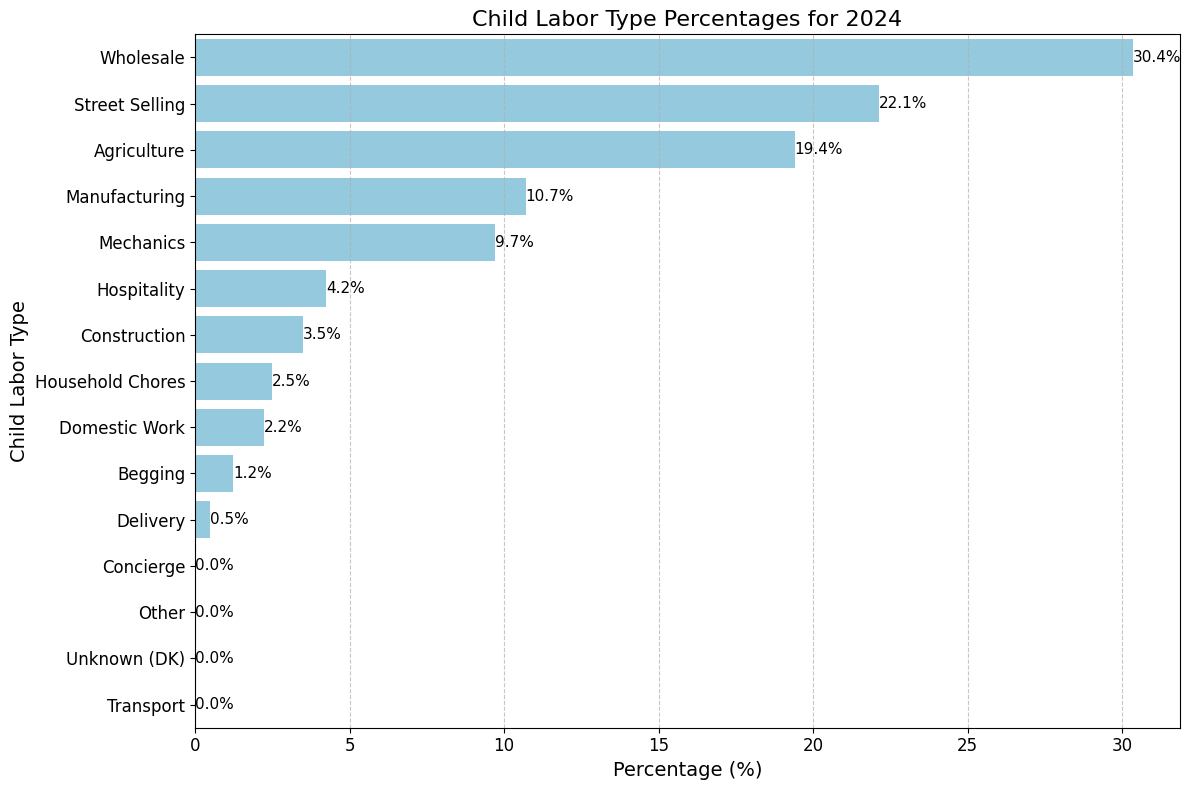

In [97]:
childlabour_percentages_2024 = childlabour_percentages[childlabour_percentages['year'] == 2024].drop('year', axis=1)

# Sorting the DataFrame by percentage values in descending order
childlabour_percentages_2024_sorted = childlabour_percentages_2024.iloc[0, :].sort_values(ascending=False)

# Renaming the columns (adjust as needed)
childlabour_percentages_2024_sorted = childlabour_percentages_2024_sorted.rename({
    'type_childlabour_hospitality': 'Hospitality',
    'type_childlabour_agric': 'Agriculture',
    'type_childlabour_construct': 'Construction',
    'type_childlabour_concierge': 'Concierge',
    'type_childlabour_manufact': 'Manufacturing',
    'type_childlabour_begging': 'Begging',
    'type_childlabour_hhchores': 'Household Chores',
    'type_childlabour_mechanics': 'Mechanics',
    'type_childlabour_delivery': 'Delivery',
    'type_childlabour_other': 'Other',
    'type_childlabour_dk': 'Unknown (DK)',
    'type_childlabour_wholesale': 'Wholesale',
    'type_childlabour_sellingstreets': 'Street Selling',
    'type_childlabour_domestic': 'Domestic Work',
    'type_childlabour_transport': 'Transport'
})

# Plotting the sorted data
plt.figure(figsize=(12, 8))  # Increased figure size to avoid layout issues
sns.barplot(x=childlabour_percentages_2024_sorted, y=childlabour_percentages_2024_sorted.index, color='skyblue')

# Adding percentage values on top of the bars
for index, value in enumerate(childlabour_percentages_2024_sorted):
    plt.text(value, index, f'{value:0.1f}%', va='center', fontsize=11)

# Customizing the plot
plt.title("Child Labor Type Percentages for 2024", fontsize=16)
plt.xlabel("Percentage (%)", fontsize=14)
plt.ylabel("Child Labor Type", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjusting the layout with increased left margin to avoid text clipping
plt.subplots_adjust(left=0.15, right=1.2, top=0.9, bottom=0.1)
plt.tight_layout()
plt.savefig('ChildLabourPercentages_2024.png')

# Show the plot
plt.show()

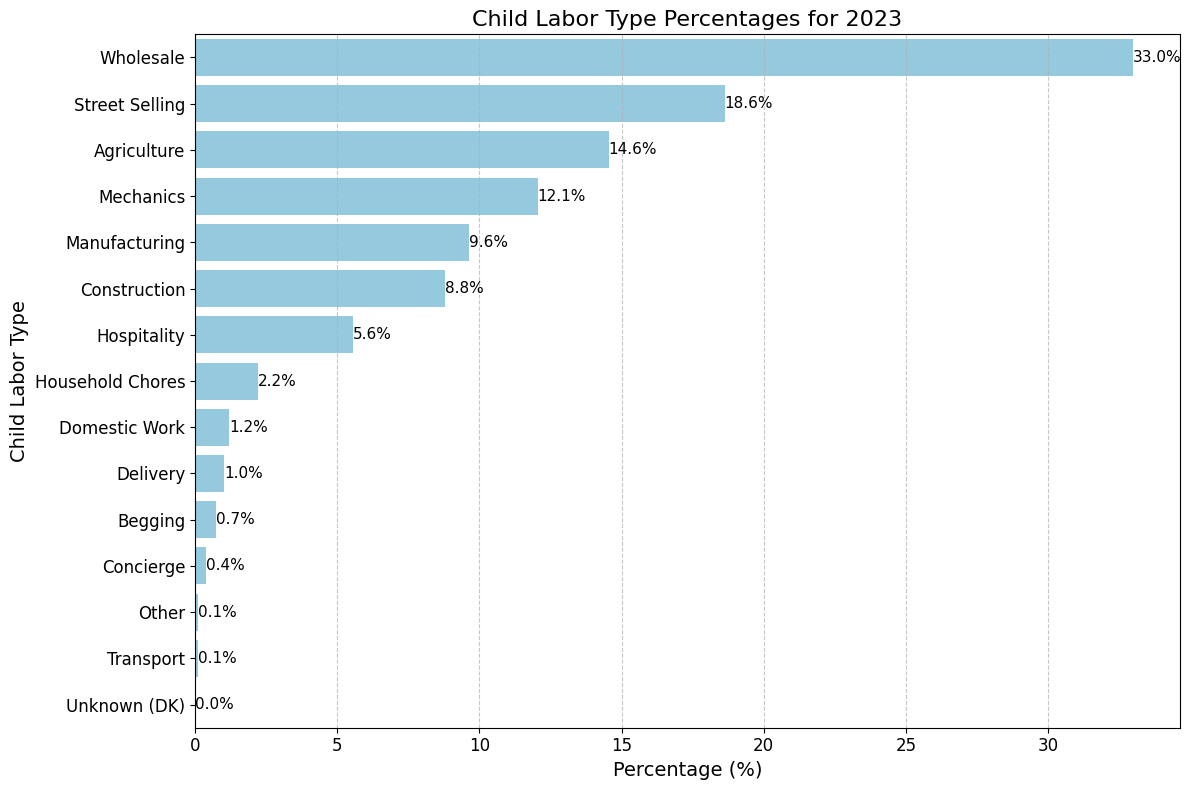

In [72]:
childlabour_percentages_2023 = childlabour_percentages[childlabour_percentages['year'] == 2023].drop('year', axis=1)

# Sorting the DataFrame by percentage values in descending order
childlabour_percentages_2023_sorted = childlabour_percentages_2023.iloc[0, :].sort_values(ascending=False)

# Renaming the columns (adjust as needed)
childlabour_percentages_2023_sorted = childlabour_percentages_2023_sorted.rename({
    'type_childlabour_hospitality': 'Hospitality',
    'type_childlabour_agric': 'Agriculture',
    'type_childlabour_construct': 'Construction',
    'type_childlabour_concierge': 'Concierge',
    'type_childlabour_manufact': 'Manufacturing',
    'type_childlabour_begging': 'Begging',
    'type_childlabour_hhchores': 'Household Chores',
    'type_childlabour_mechanics': 'Mechanics',
    'type_childlabour_delivery': 'Delivery',
    'type_childlabour_other': 'Other',
    'type_childlabour_dk': 'Unknown (DK)',
    'type_childlabour_wholesale': 'Wholesale',
    'type_childlabour_sellingstreets': 'Street Selling',
    'type_childlabour_domestic': 'Domestic Work',
    'type_childlabour_transport': 'Transport'
})

# Plotting the sorted data
plt.figure(figsize=(12, 8))  # Increased figure size to avoid layout issues
sns.barplot(x=childlabour_percentages_2023_sorted, y=childlabour_percentages_2023_sorted.index, color='skyblue')

# Adding percentage values on top of the bars
for index, value in enumerate(childlabour_percentages_2023_sorted):
    plt.text(value, index, f'{value:0.1f}%', va='center', fontsize=11)

# Customizing the plot
plt.title("Child Labor Type Percentages for 2023", fontsize=16)
plt.xlabel("Percentage (%)", fontsize=14)
plt.ylabel("Child Labor Type", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjusting the layout with increased left margin to avoid text clipping
plt.subplots_adjust(left=0.15, right=1.2, top=0.9, bottom=0.1)
plt.tight_layout()
plt.savefig('ChildLabourPercentages_2023.png')
# Show the plot
plt.show()

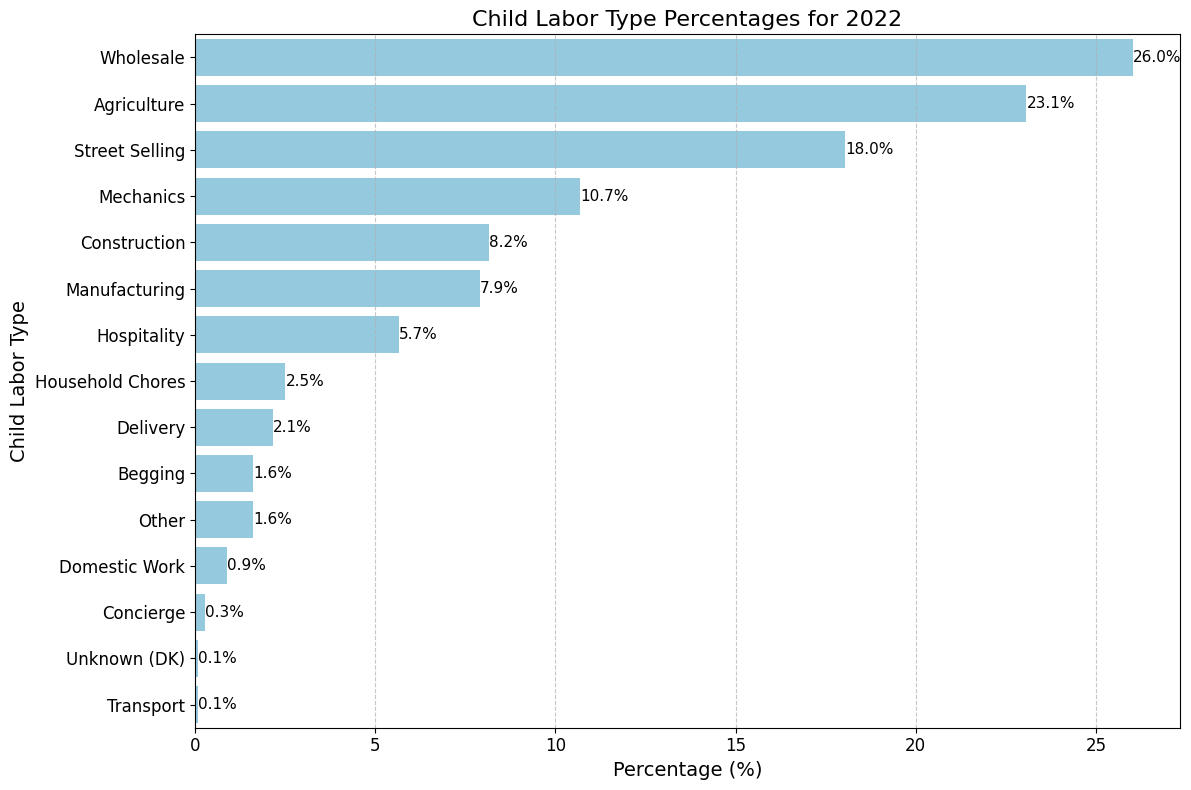

In [73]:
childlabour_percentages_2022 = childlabour_percentages[childlabour_percentages['year'] == 2022].drop('year', axis=1)

# Sorting the DataFrame by percentage values in descending order
childlabour_percentages_2022_sorted = childlabour_percentages_2022.iloc[0, :].sort_values(ascending=False)

# Renaming the columns (adjust as needed)
childlabour_percentages_2022_sorted = childlabour_percentages_2022_sorted.rename({
    'type_childlabour_hospitality': 'Hospitality',
    'type_childlabour_agric': 'Agriculture',
    'type_childlabour_construct': 'Construction',
    'type_childlabour_concierge': 'Concierge',
    'type_childlabour_manufact': 'Manufacturing',
    'type_childlabour_begging': 'Begging',
    'type_childlabour_hhchores': 'Household Chores',
    'type_childlabour_mechanics': 'Mechanics',
    'type_childlabour_delivery': 'Delivery',
    'type_childlabour_other': 'Other',
    'type_childlabour_dk': 'Unknown (DK)',
    'type_childlabour_wholesale': 'Wholesale',
    'type_childlabour_sellingstreets': 'Street Selling',
    'type_childlabour_domestic': 'Domestic Work',
    'type_childlabour_transport': 'Transport'
})

# Plotting the sorted data
plt.figure(figsize=(12, 8))  # Increased figure size to avoid layout issues
sns.barplot(x=childlabour_percentages_2022_sorted, y=childlabour_percentages_2022_sorted.index, color='skyblue')

# Adding percentage values on top of the bars
for index, value in enumerate(childlabour_percentages_2022_sorted):
    plt.text(value, index, f'{value:0.1f}%', va='center', fontsize=11)

# Customizing the plot
plt.title("Child Labor Type Percentages for 2022", fontsize=16)
plt.xlabel("Percentage (%)", fontsize=14)
plt.ylabel("Child Labor Type", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjusting the layout with increased left margin to avoid text clipping
plt.subplots_adjust(left=0.15, right=1.2, top=0.9, bottom=0.1)
plt.tight_layout()

plt.savefig('ChildLabourPercentages_2022.png')
# Show the plot
plt.show()

Does the Child Attend School?

In [30]:
df['school_attend'].value_counts()

school_attend
No, because the child has to work                               2876
Yes, all the time                                                746
Yes, some of the time because the child has to work              353
No, because school closed due to COVID-19                        184
No, because of other reasons                                     172
No, but the child is engaged in informal learning activities      26
Yes, some of the time because of other (non-work) reasons          9
Do not know                                                        9
No reply                                                           7
Name: count, dtype: int64

In [74]:
# Drop duplicates based on 'id' and 'year', and then count the unique combinations
unique_id_year_combinations = df.drop_duplicates(subset=['id', 'year']).groupby('school_attend').size()

# Print the count of unique combinations for each response
print(unique_id_year_combinations)

school_attend
Do not know                                                        8
No reply                                                           3
No, because of other reasons                                     131
No, because school closed due to COVID-19                        140
No, because the child has to work                               2178
No, but the child is engaged in informal learning activities      20
Yes, all the time                                                580
Yes, some of the time because of other (non-work) reasons          6
Yes, some of the time because the child has to work              261
dtype: int64


In [83]:
df['year'].unique()

array([2020, 2021, 2022, 2023, 2024])

In [50]:
df['school_attend'].unique()

array(['No, because the child has to work',
       'Yes, some of the time because the child has to work',
       'No, because of other reasons',
       'No, because school closed due to COVID-19', 'Yes, all the time',
       'No reply',
       'Yes, some of the time because of other (non-work) reasons',
       'No, but the child is engaged in informal learning activities',
       'Do not know'], dtype=object)

/var/folders/jr/6sjr6w2n2vl7yr0dn6y4xrmm0000gn/T/ipykernel_90547/3165039874.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=percentages_school_attend.index, x=percentages_school_attend, palette="Blues_d", orient="h")


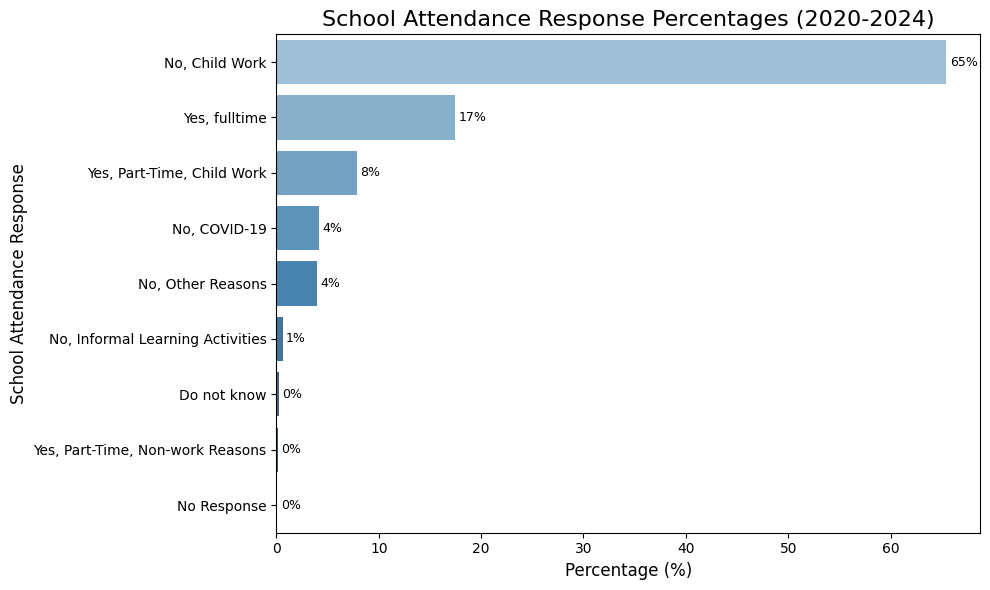

In [75]:
# Calculate the percentage of each response (based on unique 'id' and 'year' combinations)
total_unique_id_year_combinations = len(df.drop_duplicates(subset=['id', 'year']))
percentages_school_attend = (unique_id_year_combinations / total_unique_id_year_combinations) * 100

# Sort percentages in descending order
percentages_school_attend = percentages_school_attend.sort_values(ascending=False)

percentages_school_attend = percentages_school_attend.rename({
    'No, because the child has to work': 'No, Child Work',
       'Yes, some of the time because the child has to work': 'Yes, Part-Time, Child Work',
       'No, because of other reasons': 'No, Other Reasons',
       'No, because school closed due to COVID-19': 'No, COVID-19', 
       'Yes, all the time': 'Yes, fulltime',
       'No reply': 'No Response',
       'Yes, some of the time because of other (non-work) reasons': 'Yes, Part-Time, Non-work Reasons',
       'No, but the child is engaged in informal learning activities': 'No, Informal Learning Activities'
})

# Plot the percentages of responses (Horizontal Bar Plot)
plt.figure(figsize=(10, 6))
sns.barplot(y=percentages_school_attend.index, x=percentages_school_attend, palette="Blues_d", orient="h")

# Get the maximum bar length to adjust the label position dynamically
max_value = max(percentages_school_attend)

# Adding percentage labels on top of the bars, ensuring they fit within the plot
for index, value in enumerate(percentages_school_attend):
    # Dynamically add padding based on the maximum value
    label_position = value + (max_value * 0.005)  # Adding 2% padding to avoid the text going beyond the bar limit
    plt.text(label_position, index, f'{value:.0f}%', va='center', fontsize=9)

plt.title('School Attendance Response Percentages (2020-2024)', fontsize=16)
plt.xlabel('Percentage (%)', fontsize=12)
plt.ylabel('School Attendance Response', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('SchoolAttendace_Overall.png')
plt.show()

/var/folders/jr/6sjr6w2n2vl7yr0dn6y4xrmm0000gn/T/ipykernel_81914/2746549784.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=percentages.index, x=percentages.values, palette="Blues_d", orient="h", ax=axes[idx])
/var/folders/jr/6sjr6w2n2vl7yr0dn6y4xrmm0000gn/T/ipykernel_81914/2746549784.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=percentages.index, x=percentages.values, palette="Blues_d", orient="h", ax=axes[idx])


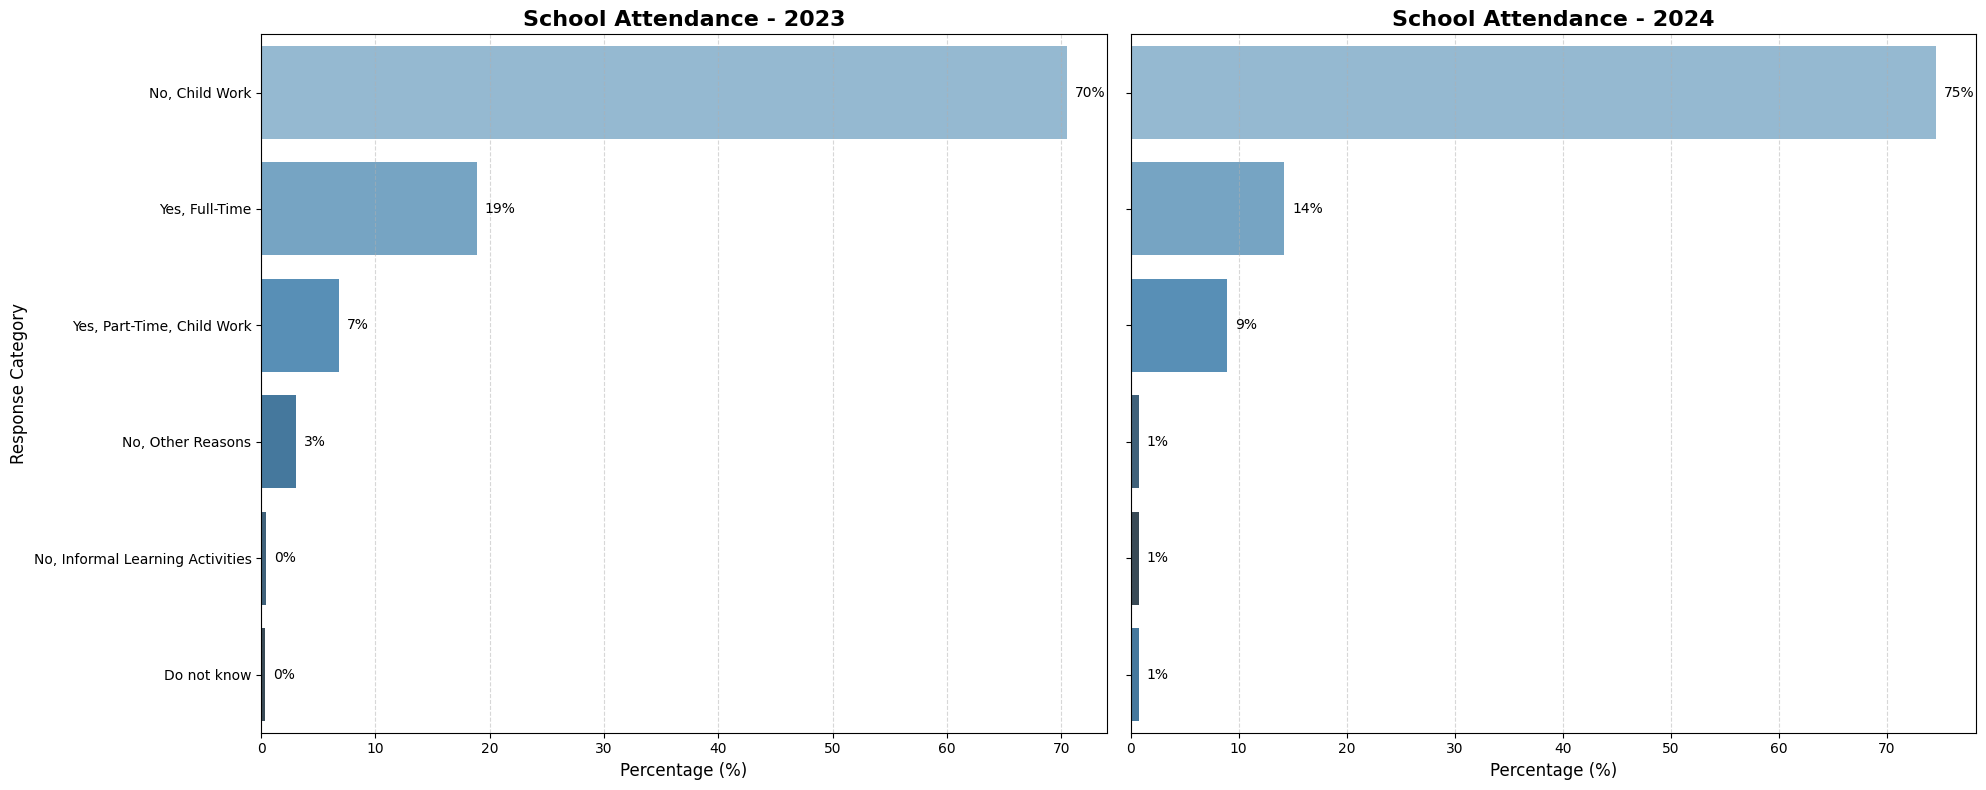

In [86]:
# Define the custom label mapping
label_rename = {
    'No, because the child has to work': 'No, Child Work',
    'Yes, some of the time because the child has to work': 'Yes, Part-Time, Child Work',
    'No, because of other reasons': 'No, Other Reasons',
    'Yes, all the time': 'Yes, Full-Time',
    'No, but the child is engaged in informal learning activities': 'No, Informal Learning Activities'
}

# Responses to exclude
exclude_responses = [
    'No reply',
    'No, because school closed due to COVID-19',
    'Yes, some of the time because of other (non-work) reasons'
]

years = [2023, 2024]
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

for idx, year in enumerate(years):
    df_year = df[df['year'] == year].drop_duplicates(subset=['id', 'year'])

    # Filter out unwanted responses
    df_year_filtered = df_year[~df_year['school_attend'].isin(exclude_responses)]

    # Count and convert to percentage
    counts = df_year_filtered['school_attend'].value_counts()
    percentages = (counts / len(df_year_filtered)) * 100
    percentages = percentages.rename(index=label_rename)
    percentages = percentages.sort_values(ascending=False)

    # Plot
    sns.barplot(y=percentages.index, x=percentages.values, palette="Blues_d", orient="h", ax=axes[idx])
    
    # Add percentage labels
    max_value = max(percentages.values)
    for i, value in enumerate(percentages.values):
        label_pos = value + (max_value * 0.01)
        axes[idx].text(label_pos, i, f"{value:.0f}%", va="center", fontsize=10)

    # Titles and labels
    axes[idx].set_title(f"School Attendance - {year}", fontsize=16, weight='bold')
    axes[idx].set_xlabel("Percentage (%)", fontsize=12)
    if idx == 0:
        axes[idx].set_ylabel("Response Category", fontsize=12)
    else:
        axes[idx].set_ylabel("")

    # Ticks and grid
    axes[idx].tick_params(axis='x', labelsize=10)
    axes[idx].tick_params(axis='y', labelsize=10)
    axes[idx].grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('SchoolAttendance_2023_2024.png')
plt.show()


/var/folders/jr/6sjr6w2n2vl7yr0dn6y4xrmm0000gn/T/ipykernel_81914/673723571.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=hazard_percentages.index, x=hazard_percentages.values,
/var/folders/jr/6sjr6w2n2vl7yr0dn6y4xrmm0000gn/T/ipykernel_81914/673723571.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=hazard_percentages.index, x=hazard_percentages.values,


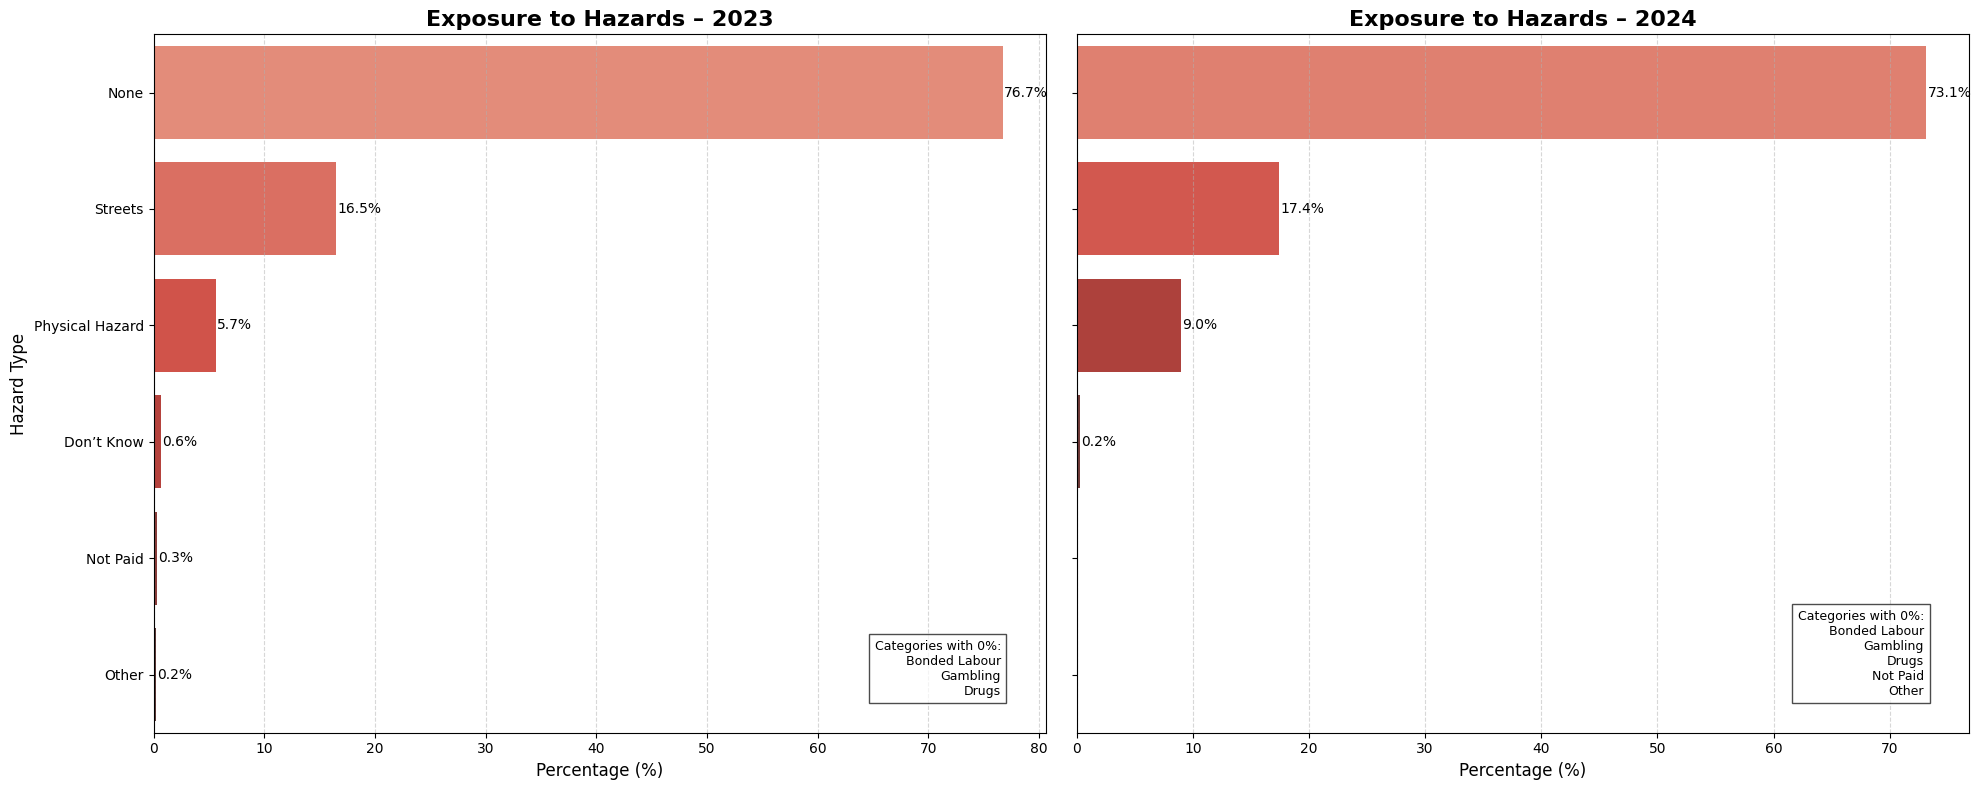

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of hazard columns
hazard_columns = [
    'hazard_physhazard', 'hazard_bonded', 'hazard_streets',
    'hazard_gambling', 'hazard_drug', 'hazard_nopay',
    'hazard_none', 'hazard_other', 'hazard_dk'
]

# Optional renaming for readability
hazard_labels = {
    'hazard_physhazard': 'Physical Hazard',
    'hazard_bonded': 'Bonded Labour',
    'hazard_streets': 'Streets',
    'hazard_gambling': 'Gambling',
    'hazard_drug': 'Drugs',
    'hazard_nopay': 'Not Paid',
    'hazard_none': 'None',
    'hazard_other': 'Other',
    'hazard_dk': 'Don’t Know'
}

# Choose years to visualize
years = [2023, 2024]
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

for idx, year in enumerate(years):
    df_year = df[df['year'] == year].drop_duplicates(subset=['id', 'year'])

    total = len(df_year)
    hazard_percentages = {}
    zero_percent_categories = []

    for col in hazard_columns:
        if col in df_year.columns:
            percentage = df_year[col].sum() / total * 100
            label = hazard_labels[col]
            if percentage > 0:
                hazard_percentages[label] = percentage
            else:
                zero_percent_categories.append(label)

    # Convert to Series and sort
    hazard_percentages = pd.Series(hazard_percentages).sort_values(ascending=False)

    # Plotting
    sns.barplot(y=hazard_percentages.index, x=hazard_percentages.values,
                palette='Reds_d', ax=axes[idx], orient='h')

    # Add labels
    max_value = max(hazard_percentages.values) if not hazard_percentages.empty else 0
    for i, value in enumerate(hazard_percentages.values):
        label_pos = value + (max_value * 0.0015)
        axes[idx].text(label_pos, i, f"{value:.1f}%", va="center", fontsize=10)

    # Formatting
    axes[idx].set_title(f"Exposure to Hazards – {year}", fontsize=16, weight='bold')
    axes[idx].set_xlabel("Percentage (%)", fontsize=12)
    if idx == 0:
        axes[idx].set_ylabel("Hazard Type", fontsize=12)
    else:
        axes[idx].set_ylabel("")
    axes[idx].tick_params(axis='x', labelsize=10)
    axes[idx].tick_params(axis='y', labelsize=10)
    axes[idx].grid(axis='x', linestyle='--', alpha=0.5)

    # Display excluded 0% categories in a text box
    if zero_percent_categories:
        box_text = "Categories with 0%:\n" + "\n".join(zero_percent_categories)
        axes[idx].text(0.95, 0.05, box_text, transform=axes[idx].transAxes,
                       fontsize=9, verticalalignment='bottom',
                       horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.savefig('ExposureHazards_2023_2024.png')
plt.show()

/var/folders/jr/6sjr6w2n2vl7yr0dn6y4xrmm0000gn/T/ipykernel_81914/4146149073.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=hazard_percentages.index, x=hazard_percentages.values,
/var/folders/jr/6sjr6w2n2vl7yr0dn6y4xrmm0000gn/T/ipykernel_81914/4146149073.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=hazard_percentages.index, x=hazard_percentages.values,


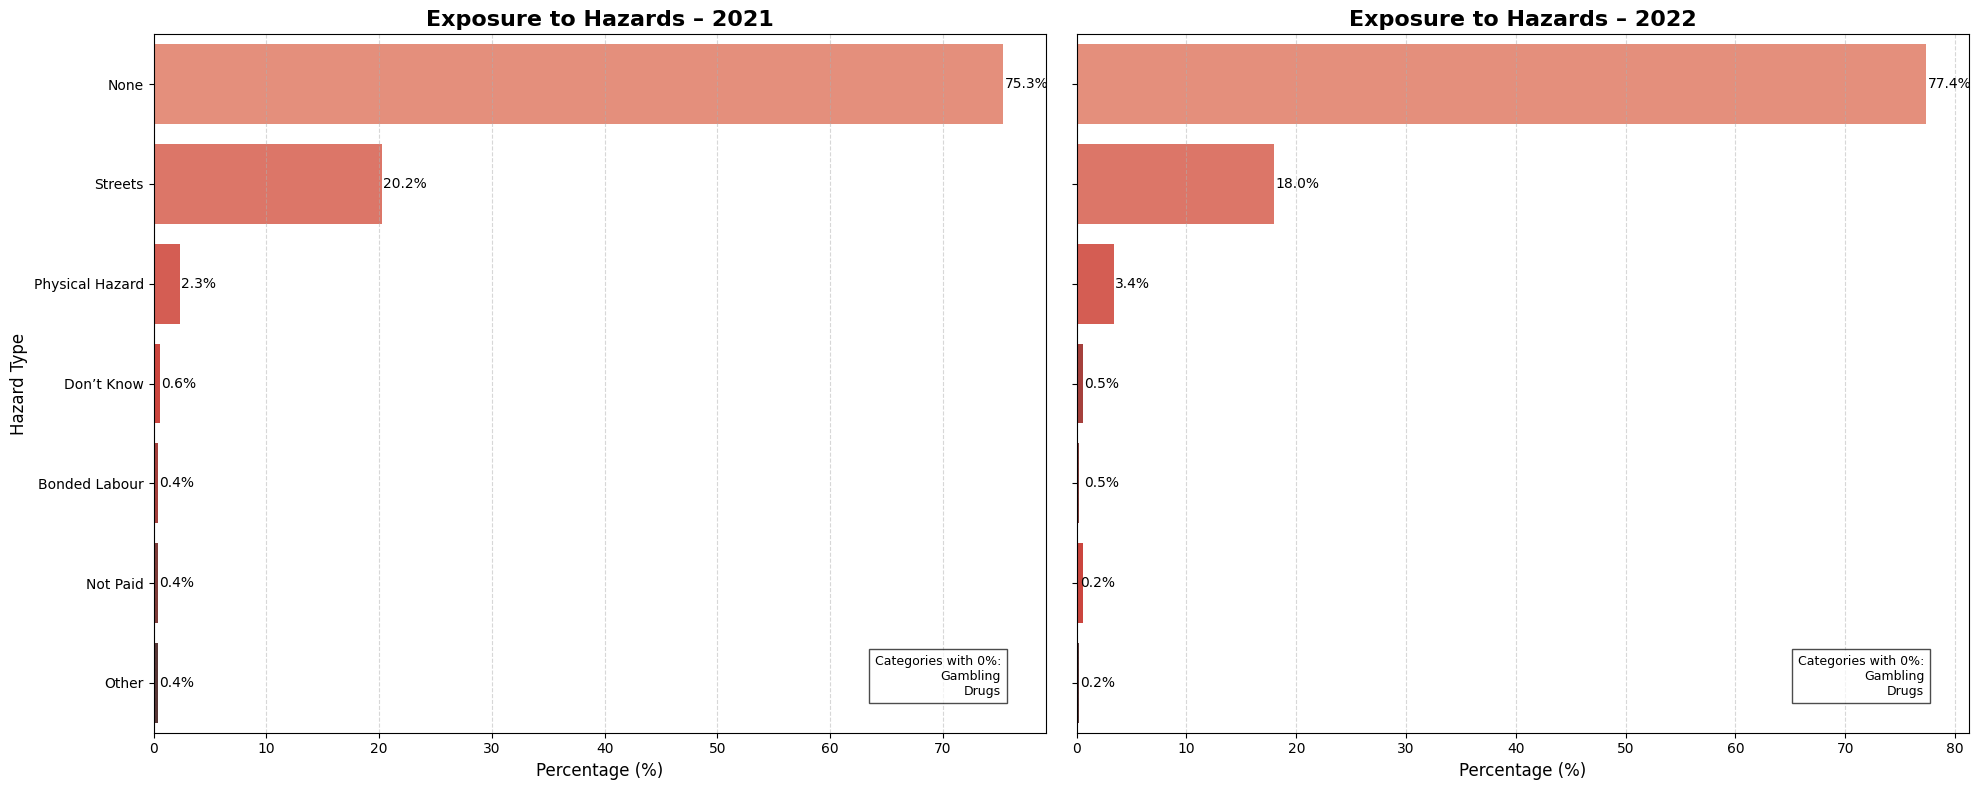

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of hazard columns
hazard_columns = [
    'hazard_physhazard', 'hazard_bonded', 'hazard_streets',
    'hazard_gambling', 'hazard_drug', 'hazard_nopay',
    'hazard_none', 'hazard_other', 'hazard_dk'
]

# Optional renaming for readability
hazard_labels = {
    'hazard_physhazard': 'Physical Hazard',
    'hazard_bonded': 'Bonded Labour',
    'hazard_streets': 'Streets',
    'hazard_gambling': 'Gambling',
    'hazard_drug': 'Drugs',
    'hazard_nopay': 'Not Paid',
    'hazard_none': 'None',
    'hazard_other': 'Other',
    'hazard_dk': 'Don’t Know'
}

# Choose years to visualize
years = [2021, 2022]
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

for idx, year in enumerate(years):
    df_year = df[df['year'] == year].drop_duplicates(subset=['id', 'year'])

    total = len(df_year)
    hazard_percentages = {}
    zero_percent_categories = []

    for col in hazard_columns:
        if col in df_year.columns:
            percentage = df_year[col].sum() / total * 100
            label = hazard_labels[col]
            if percentage > 0:
                hazard_percentages[label] = percentage
            else:
                zero_percent_categories.append(label)

    # Convert to Series and sort
    hazard_percentages = pd.Series(hazard_percentages).sort_values(ascending=False)

    # Plotting
    sns.barplot(y=hazard_percentages.index, x=hazard_percentages.values,
                palette='Reds_d', ax=axes[idx], orient='h')

    # Add labels
    max_value = max(hazard_percentages.values) if not hazard_percentages.empty else 0
    for i, value in enumerate(hazard_percentages.values):
        label_pos = value + (max_value * 0.0015)
        axes[idx].text(label_pos, i, f"{value:.1f}%", va="center", fontsize=10)

    # Formatting
    axes[idx].set_title(f"Exposure to Hazards – {year}", fontsize=16, weight='bold')
    axes[idx].set_xlabel("Percentage (%)", fontsize=12)
    if idx == 0:
        axes[idx].set_ylabel("Hazard Type", fontsize=12)
    else:
        axes[idx].set_ylabel("")
    axes[idx].tick_params(axis='x', labelsize=10)
    axes[idx].tick_params(axis='y', labelsize=10)
    axes[idx].grid(axis='x', linestyle='--', alpha=0.5)

    # Display excluded 0% categories in a text box
    if zero_percent_categories:
        box_text = "Categories with 0%:\n" + "\n".join(zero_percent_categories)
        axes[idx].text(0.95, 0.05, box_text, transform=axes[idx].transAxes,
                       fontsize=9, verticalalignment='bottom',
                       horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.savefig('ExposureHazards_2021_2022.png')
plt.show()

In [3]:
combined_df = pd.read_csv('combined_hh_dataset.csv')

/var/folders/jr/6sjr6w2n2vl7yr0dn6y4xrmm0000gn/T/ipykernel_98212/2285770467.py:1: DtypeWarning: Columns (4,5,8,10,14,18,20,99,100,105,113,114,125,126,127,160,161,162,170,171,224,261,263,264,382,383,407,408,412,414,417,418,431,463,464,480,487,488,505,506,518,530,531,545,554,561,563,571,572,576,578,581,582,592,608,610,611,612,623,632,633,634,635,639,642,646,651,653,655,657,663,670,671,685,688,703,722,738,739,740,748) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.read_csv('combined_hh_dataset.csv')


In [36]:
print(combined_df.columns.to_list())

['date_interview', 'partner_agency', 'type_interview', 'reachable', 'reason_unreachable', 'consent', 'gender', 'age_bracket', 'caregiver_consent', 'nationality', 'hoh_sex', 'hh_size', 'no_children', 'no_over_fifteen', 'disability', 'gov_leb', 'dist_leb', 'shelter_type', 'rent_paym', 'monthly_rent', 'paid_rent', 'unpaid_rent', 'rest_measures_ban_motorcycle', 'rest_measures_confiscation_id', 'rest_measures_closure_shops', 'rest_measures_curfew', 'rest_measures_restr_rental', 'rest_measures_unlawful_taxes', 'rest_measures_raids', 'rest_measures_dk', 'rest_measures_noreply', 'rest_measures_demolition', 'rest_measures_pressure', 'rest_measures_imposition_id', 'rest_measures_movement_covid', 'rest_measures_report_visitors', 'rest_measures_report_movement', 'rest_measures_harassment', 'rest_measures_phonechecks', 'rest_measures_nomeasures', 'rest_measures_lockdown', 'socio_econ_rent', 'socio_econ_food_money', 'socio_econ_healthcare', 'socio_econ_medicine', 'socio_econ_loss_job', 'socio_econ_f

In [47]:
groups = {
    'child_has_to_work': [
        'school3', 'school15', 'outschool1', 'school_out1'
    ],
    'school_too_far': [
        'school4', 'school16', 'outschool2', 'school_out2'
    ],
    'school_fees_high': [
        'school5', 'school17', 'outschool3', 'school_out3'
    ],
    'school_strike': [
        'school6', 'school18', 'outschool4', 'school_out4'
    ],
    'child_married': [
        'school7', 'school19', 'outschool5', 'school_out5', 'school_out5'
    ],
    'fear_violence': [
        'school8', 'school20', 'outschool6', 'school_out6'
    ],
    'education_not_important': [
        'school9', 'school21', 'outschool7', 'school_out7'
    ],
    'rejected_due_to_nationality': [
        'school10', 'school22', 'outschool8', 'school_out8'
    ],
    'overcrowded_classes': [
        'school11', 'school23', 'outschool9', 'school_out9'
    ],
    'no_birth_certificate': [
        'school12', 'school24', 'outschool10', 'school_out10'
    ],
    'other_reason': [
        'school13', 'school25', 'outschool11'
    ]
}

def combine_school_reasons(df, groups):
    for new_col, old_cols in groups.items():
        available_cols = [col for col in old_cols if col in df.columns]
        if available_cols:
            df[new_col] = df[available_cols].max(axis=1)
    return df

In [48]:
df = combine_school_reasons(combined_df, groups)


In [64]:
yes_no_map = {'Yes': 1.0, 'No': 0.0}

# Apply this mapping to all relevant columns
columns_to_check = [
    'child_work0', 'child_work1', 'child_work2', 'child_work3',
    'child_work4', 'child_work5'
]

df[columns_to_check] = df[columns_to_check].apply(lambda col: col.map(yes_no_map).fillna(col))

/var/folders/jr/6sjr6w2n2vl7yr0dn6y4xrmm0000gn/T/ipykernel_98212/2135410394.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_check] = df[columns_to_check].apply(lambda col: col.map(yes_no_map).fillna(col))
/var/folders/jr/6sjr6w2n2vl7yr0dn6y4xrmm0000gn/T/ipykernel_98212/2135410394.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_check] = df[columns_to_check].apply(lambda col: col.map(yes_no_map).fillna(col))
/var/folders/jr/6sjr6w2n2vl7yr0dn6y4xrmm0000gn/T/ipykernel_98212/2135410394.py:9: FutureWarning: Downcasting objec

In [69]:
# Make sure all relevant columns exist
columns_to_check = [
    'child_work0', 'child_work1', 'child_work2', 'child_work3',
    'child_work4', 'child_work5'
]

# Create new combined column: flag if any of the conditions are met
df['child_labor_flag'] = df[columns_to_check].apply(
    lambda row: any(pd.to_numeric(row, errors='coerce').fillna(0) > 0), axis=1
)

df['child_labor_count'] = df[columns_to_check].apply(
    lambda row: pd.to_numeric(row, errors='coerce').fillna(0).gt(0).sum(), axis=1
)

df['child_labor_total_children'] = df[columns_to_check].apply(
    lambda row: pd.to_numeric(row, errors='coerce').fillna(0).sum(), axis=1
)


In [70]:
df['child_labor_total_children'].value_counts()

child_labor_total_children
0.0     102715
1.0        911
2.0        244
3.0         32
4.0         15
5.0          3
6.0          1
21.0         1
Name: count, dtype: int64

In [63]:
df['child_work5'].value_counts()

child_work5
No     7592
Yes     190
Name: count, dtype: int64

In [57]:
df['child_labor_count'] = df[columns_to_check].apply(
    lambda row: pd.to_numeric(row, errors='coerce').fillna(0).gt(0).sum(), axis=1
)

In [10]:
combined_df['school_fees_high'].value_counts()

school_fees_high
0.0    4270
1.0    3501
Name: count, dtype: int64

In [17]:
df['fear_violence'].value_counts()

fear_violence
0.0    7636
1.0     135
Name: count, dtype: int64

1. Use 'outschool' --> Graph the top 5 responses overall, and the top 5 each year. Similar to other indicators, 'outschool' provide the indicators divided by each.
2. Do the same with child work.

In [12]:
# Melt the dataframe to long format for reasons
reason_cols = [
    'child_has_to_work', 'school_too_far', 'school_fees_high',
    'school_strike', 'child_married', 'fear_violence',
    'education_not_important', 'rejected_due_to_nationality',
    'overcrowded_classes', 'no_birth_certificate', 'other_reason'
]

melted = df.melt(
    id_vars=['id', 'year'],
    value_vars=reason_cols,
    var_name='reason',
    value_name='indicator'
)

# Filter where the reason applies (indicator == 1)
reason_counts = (
    melted[melted['indicator'] == 1]
    .groupby(['year', 'reason'])
    .size()
    .reset_index(name='count')
)

/var/folders/jr/6sjr6w2n2vl7yr0dn6y4xrmm0000gn/T/ipykernel_90547/2826609756.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


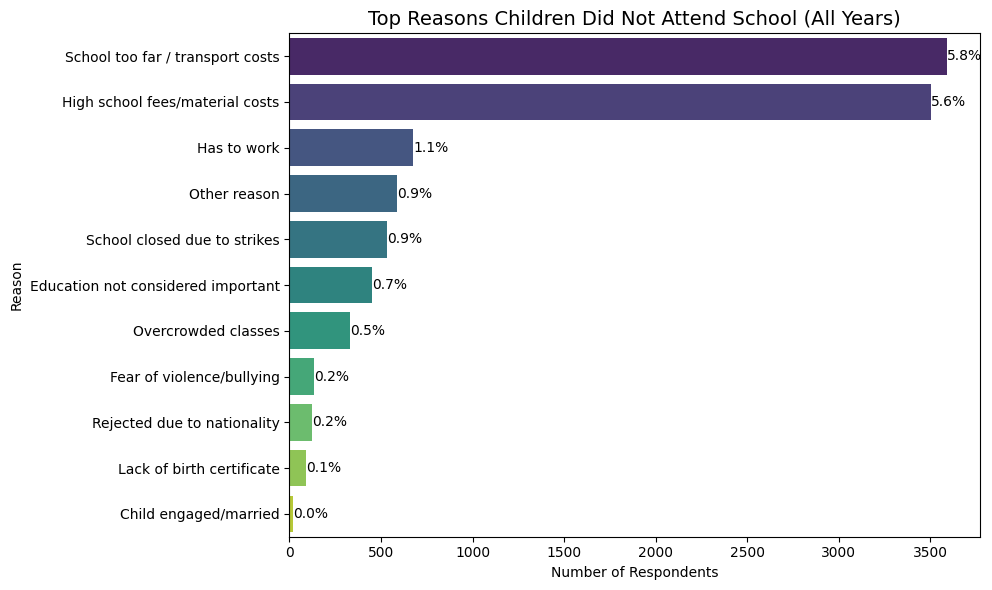

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate total counts and percentages for all years
total_reason_perc = (
    reason_counts
    .groupby('reason_clean')[['count', 'total']]
    .sum()
    .assign(percent=lambda x: (x['count'] / x['total']) * 100)
    .sort_values(by='count', ascending=False)  # ascending for horizontal bar order
    .reset_index()
)

# Plot
plt.figure(figsize=(10, 6))
bars = sns.barplot(
    data=total_reason_perc,
    x='count',
    y='reason_clean',
    palette='viridis'
)

# Add percentage labels to each bar
for i, row in total_reason_perc.iterrows():
    bars.text(
        row['count'] + 0.7,  # Slightly outside the bar
        i,
        f"{row['percent']:.1f}%",
        va='center'
    )

plt.title("Top Reasons Children Did Not Attend School (All Years)", fontsize=14)
plt.xlabel("Number of Respondents")
plt.ylabel("Reason")
plt.tight_layout()
plt.savefig('school_nonAttendance.png')
plt.show()

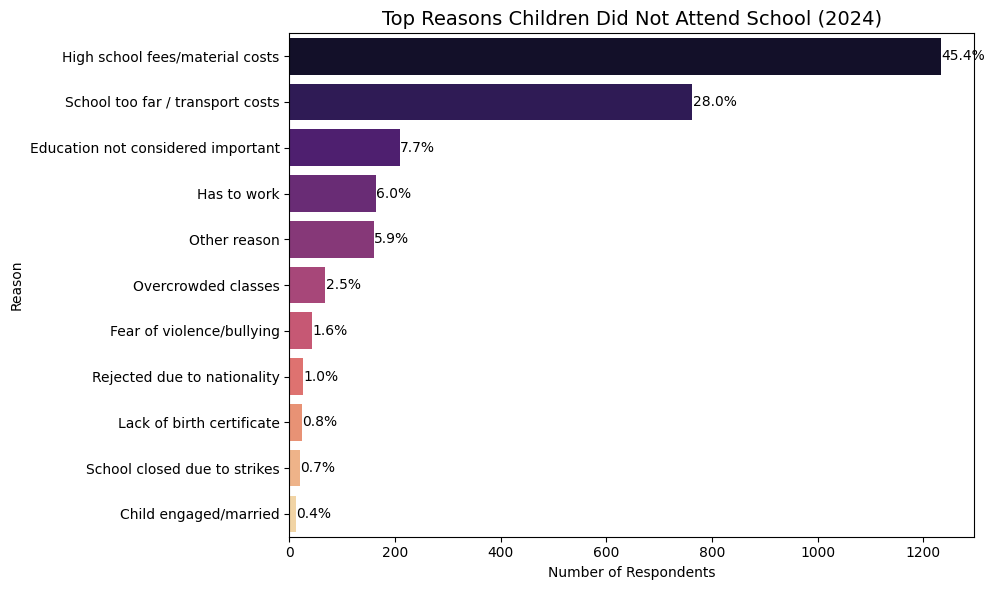

In [66]:
# Filter and sort for 2024
reasons_2024 = (
    reason_counts[reason_counts['year'] == 2024]
    .copy()
    .sort_values(by='count', ascending=False)
)

# Calculate the percentage if not already present
total_count = reasons_2024['count'].sum()
reasons_2024['percent'] = (reasons_2024['count'] / total_count) * 100

# Apply clean labels
reasons_2024['reason_clean'] = reasons_2024['reason'].map(rename_dict)

# Plot
plt.figure(figsize=(10, 6))
bars_2024 = sns.barplot(
    data=reasons_2024,
    x='count',
    y='reason_clean',
    hue='reason_clean',  # Assign the y variable as hue
    palette='magma',
    legend=False  # Disable the legend to avoid unnecessary clutter
)

# Add percentage labels to each bar
for i, patch in enumerate(bars_2024.patches):
    # Get the x position (width) of the bar
    width = patch.get_width()

    # Get the y position (height) of the bar
    y_position = patch.get_y() + patch.get_height() / 2  # Center the text vertically

    # Add the percentage text slightly outside the bar
    bars_2024.text(
        width + 0.7,  # Slightly outside the bar
        y_position,  # Center the text vertically based on the bar height
        f"{reasons_2024.iloc[i]['percent']:.1f}%",  # Format percentage text
        va='center',  # Vertically center the text
        ha='left',  # Horizontally align to the left of the bar
        fontsize=10
    )

# Adjust the plot layout and margins
plt.title("Top Reasons Children Did Not Attend School (2024)", fontsize=14)
plt.xlabel("Number of Respondents")
plt.ylabel("Reason")

# Use `subplots_adjust` to manually adjust margins for better spacing
plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.1)
plt.tight_layout()
plt.savefig('school_nonAttendance_2024.png')
plt.show()

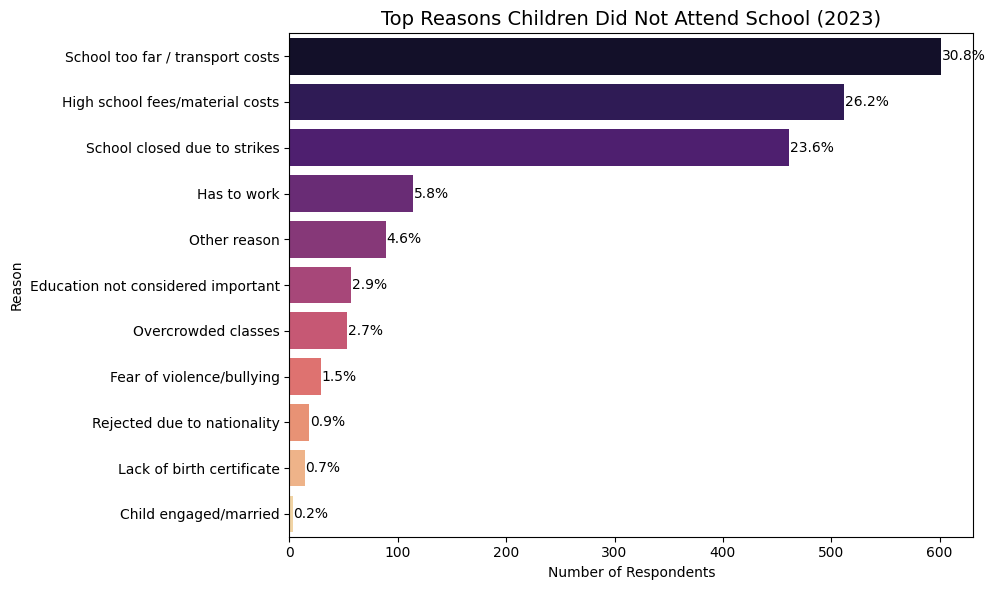

In [67]:
# Filter and sort for 2023
reasons_2023 = (
    reason_counts[reason_counts['year'] == 2023]
    .copy()
    .sort_values(by='count', ascending=False)
)

# Calculate the percentage if not already present
total_count = reasons_2023['count'].sum()
reasons_2023['percent'] = (reasons_2023['count'] / total_count) * 100

# Apply clean labels
reasons_2023['reason_clean'] = reasons_2023['reason'].map(rename_dict)

# Plot
plt.figure(figsize=(10, 6))
bars_2023 = sns.barplot(
    data=reasons_2023,
    x='count',
    y='reason_clean',
    hue='reason_clean',  # Assign the y variable as hue
    palette='magma',
    legend=False  # Disable the legend to avoid unnecessary clutter
)

# Add percentage labels to each bar
for i, patch in enumerate(bars_2023.patches):
    # Get the x position (width) of the bar
    width = patch.get_width()

    # Get the y position (height) of the bar
    y_position = patch.get_y() + patch.get_height() / 2  # Center the text vertically

    # Add the percentage text slightly outside the bar
    bars_2023.text(
        width + 0.7,  # Slightly outside the bar
        y_position,  # Center the text vertically based on the bar height
        f"{reasons_2023.iloc[i]['percent']:.1f}%",  # Format percentage text
        va='center',  # Vertically center the text
        ha='left',  # Horizontally align to the left of the bar
        fontsize=10
    )

# Adjust the plot layout and margins
plt.title("Top Reasons Children Did Not Attend School (2023)", fontsize=14)
plt.xlabel("Number of Respondents")
plt.ylabel("Reason")

# Use `subplots_adjust` to manually adjust margins for better spacing
plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.1)
plt.tight_layout()
plt.savefig('school_nonAttendance_2023.png')
plt.show()

In [65]:
combined_df['child_work5'].value_counts()

child_work5
No     7592
Yes     190
Name: count, dtype: int64

In [38]:
df["school_combined"] = df["school1"].combine_first(df["school_attend"])

In [49]:
columns_required = ['hh_size', 'no_children','no_over_fifteen',
                    'inc2', 'inc3', 'inc4', 'inc5', 'inc6',
                    'eviction_notice', 'actual_eviction', 
                    'socio_econ_rent', 'socio_econ_food_money', 'socio_econ_healthcare', 'socio_econ_medicine', 'socio_econ_med_availability',
                    'socio_econ_loss_job', 'socio_econ_famsupport', 'socio_econ_mentalhealth', 'socio_econ_education', 'socio_econ_shelter', 'socio_econ_threat_evict',
                    'socio_econ_lowerqual_shelter', 'socio_econ_abandoned', 'socio_econ_return', 'socio_econ_moved_leb', 'socio_econ_travel_third', 'socio_econ_baby',
                    'socio_econ_travel_homeclimate', 'socio_econ_none', 'socio_econ_dk01', 'socio_econ_noreply', 'borr2' , 'borr3', 'afford1' , 'afford2', 'unabletravel',
                    'mentalhealth_mild', 'mentalhealth_selfharm', 'mental_health_substance', 'mentalhealth_suicide', 'mentalhealth_depress', 'mentalhealth_worse', 'mental_health_no_symptoms',
                    'children_symptoms_sadness', 'children_symptoms_withdrawal', 'children_symptoms_selfharm', 'children_symptoms_suicidal', 'children_symptoms_low_interest',
                    'children_symptoms_no_symptoms', 'children_symptoms_dk', 'children_symptoms_noreply', 'child_has_to_work', 'school_too_far', 'school_fees_high',
                    'school_strike', 'child_married', 'fear_violence', 'education_not_important', 'rejected_due_to_nationality',
                    'overcrowded_classes', 'no_birth_certificate', 'other_reason', 'id', 'year', 'quarter',
                    'child_work0', 'child_work1', 'child_work2', 'child_work3', 'child_work4', 'child_work5', 'specific_needs_hh_womanrisk', 'specific_needs_hh_childrisk', 'specific_needs_hh_singlepar',
                        "tensions_incidents_verbal_harass", "tensions_incidents_phys_harass", "tensions_incidents_robbery", "tensions_incidents_women_harass", "tensions_incidents_subsidized",
                        "tensions_incidents_shop_atm", "tensions_incidents_socmedia", "tensions_incidents_medarticle", "tensions_incidents_armedviol", "tensions_incidents_physviolence", "tensions_incidents_politstatem",
                        "tensions_incidents_protest", "tensions_incidents_disputes", "tensions_incidents_eviction", "tensions_incidents_movement", "tensions_incidents_threat", "tensions_incidents_discrim",
                        'dist_leb', "school_combined"
                    ]



final_df = df[columns_required]

In [40]:
final_df = final_df[final_df['no_children'] != 0.0]

In [46]:
final_df['child_married'].value_counts()

child_married
0.0    7746
1.0      22
Name: count, dtype: int64

In [55]:
nan_count = final_df.isna().sum() / len(final_df) * 100
nan_count_sorted = nan_count.sort_values(ascending=False)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(nan_count_sorted)

inc5                                99.834491
borr2                               99.689190
inc2                                99.357210
child_work0                         96.832240
child_work4                         96.832240
inc4                                94.423702
other_reason                        92.522276
child_work5                         92.511691
inc3                                91.765940
inc6                                91.487847
borr3                               91.381998
mentalhealth_suicide                91.071188
mentalhealth_selfharm               91.071188
mentalhealth_mild                   91.071188
mentalhealth_worse                  91.071188
mentalhealth_depress                91.071188
no_birth_certificate                88.771386
school_strike                       88.771386
fear_violence                       88.771386
child_married                       88.771386
school_fees_high                    88.771386
education_not_important           

In [31]:
df_2024['school_attend'].value_counts()

Series([], Name: count, dtype: int64)